<a href="https://colab.research.google.com/github/theqasimkhan/Programming-For-AI-Lab/blob/main/Lab_Report_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name : Qasim Khan**

# **Reg No: B22F0248AI051**

# **Dept:   AI-Blue**

# **Task 1: House Price Prediction Using Linear and Ridge Regression**

# **Lab Report: Machine Learning Techniques on House Price and Loan Approval Datasets**

**Introduction**
This report covers two machine learning tasks:

Predicting house prices using Linear and Ridge Regression.

Classifying loan approval using Logistic Regression. *italicized text*

Each task includes data preprocessing, model training, performance evaluation, and interpretation of results.

1. Import **Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
plt.style.use('seaborn')


<ipython-input-1-c58d4ce2986a>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


**2. Load and Preprocess the Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing.csv


In [ ]:
# Load the dataset
house_data = pd.read_csv('/content/Housing.csv')

# Preview dataset
house_data.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **3. Data Preprocessing**

Handle Missing Values (if any): Fill missing values with median.

Encoding Categorical Features: Use LabelEncoder for categorical variables.

In [ ]:
# Separate numeric and categorical columns
numeric_cols = house_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = house_data.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with median
house_data[numeric_cols] = house_data[numeric_cols].apply(lambda col: col.fillna(col.median()))

# Fill missing values for categorical columns with mode
house_data[categorical_cols] = house_data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Encode categorical features
label_encoder = LabelEncoder()
for col in categorical_cols:
    house_data[col] = label_encoder.fit_transform(house_data[col])

# Define features (X) and target (y)
X = house_data.drop('price', axis=1)  # Now using 'price' as the target column
y = house_data['price']



# **4. Train-Test Split**

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **5. Model Training and Evaluation**

**Linear Regression**

In [ ]:
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

# Evaluation Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")


Linear Regression MSE: 1771751116594.0352
Linear Regression R-squared: 0.6494754192267803


**Ridge Regression with Feature Scaling**

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Evaluation Metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")


Ridge Regression MSE: 1772333186531.0127
Ridge Regression R-squared: 0.6493602620702651


# **6. Feature Importance Analysis**

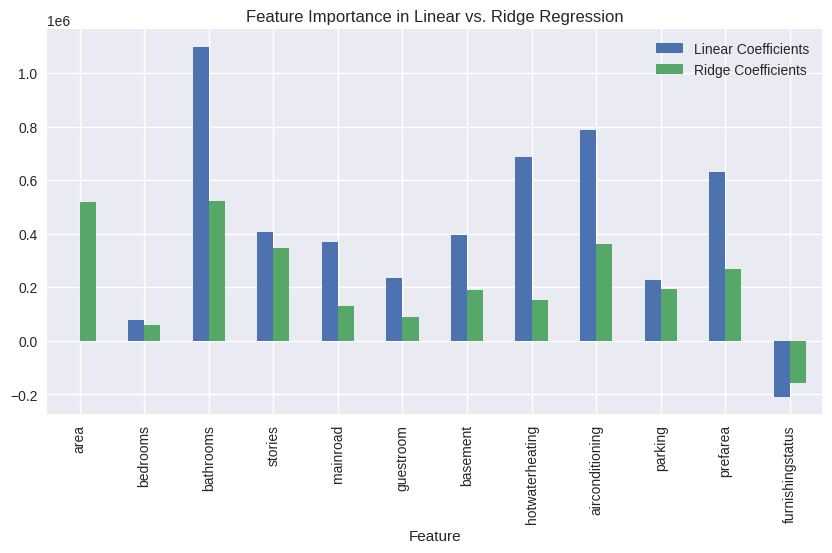

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Linear Coefficients': linear_model.coef_,
    'Ridge Coefficients': ridge_model.coef_
})

# Plot Feature Importance
coefficients.plot(kind='bar', x='Feature', figsize=(10, 5))
plt.title('Feature Importance in Linear vs. Ridge Regression')
plt.show()


# **7. Discussion and Insights**

**Linear vs. Ridge Regression:** Compare MSE and R-squared values to evaluate model performance.

**Impact of Regularization:** Discuss how Ridge regularization affects feature coefficients and prevents overfitting.

# **Task 2: Loan Approval Prediction Using Logistic Regression**

# **1. Import Libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score


## **2. Load and Preprocess the Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

# Load the dataset
loan_data = pd.read_csv('/content/loan_approval_dataset.csv')

# Preview dataset
loan_data.head()


Saving loan_approval_dataset.csv to loan_approval_dataset.csv


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **3. Data Preprocessing**

Handle Missing Values: Fill with median values.

Encoding Categorical Variables: Use LabelEncoder.

In [ ]:
# Separate numeric and categorical columns
numeric_cols = loan_data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = loan_data.select_dtypes(include=['object']).columns

# Fill missing values for numeric columns with median
loan_data[numeric_cols] = loan_data[numeric_cols].apply(lambda col: col.fillna(col.median()))

# Fill missing values for categorical columns with mode
loan_data[categorical_cols] = loan_data[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]))

# Encode categorical features using LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_cols:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

# Define features (X) and target (y)
# Check for column name variations and rename if necessary
loan_data.columns = loan_data.columns.str.strip().str.lower() # strip leading/trailing spaces and lowercase all column names

X = loan_data.drop('loan_status', axis=1)  # Using 'loan_status' as the target column
y = loan_data['loan_status']

# **4. Train-Test Split and Feature Scaling**

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scale features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **5. Model Training and Evaluation**

**Logistic Regression Model**

In [ ]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


**Evaluation Metrics**

Confusion Matrix and Classification Report

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
 [[623  36]
 [ 46 363]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       659
           1       0.91      0.89      0.90       409

    accuracy                           0.92      1068
   macro avg       0.92      0.92      0.92      1068
weighted avg       0.92      0.92      0.92      1068

Accuracy: 0.92


# **6. ROC Curve and AUC**

AUC: 0.97


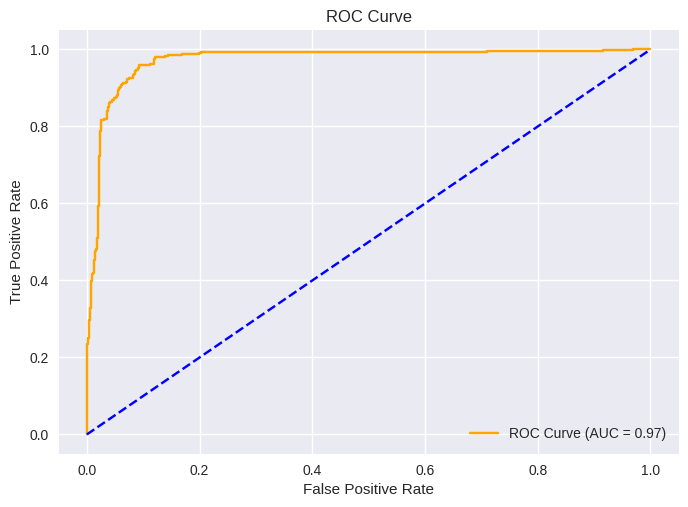

In [ ]:
y_prob = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)
print(f"AUC: {auc:.2f}")

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# **7. Discussion and Insights**

### **Confusion Matrix:** A table that shows true positive, false positive, true negative, and false negative counts. This helps visualize how well the model differentiates between approved and rejected loans.

### **Classification Report:** This report includes:

### **Precision:** The proportion of correct positive predictions out of all positive predictions made by the model.

### **Recall: **The proportion of true positives out of the total actual positives, indicating the model’s ability to identify approved loans correctly.

### **F1-Score:** The harmonic mean of precision and recall, providing a balance between the two for an overall evaluation.


### **Accuracy Score:** The overall ratio of correct predictions to total predictions. High accuracy indicates the model performs well on the test set.

### **ROC Curve and AUC:** The ROC curve plots the true positive rate against the false positive rate, showing the trade-off between sensitivity and specificity. The AUC (Area Under the Curve) summarizes the model’s ability to discriminate between the two classes, with a value closer to 1 indicating high predictive performance.


These metrics collectively assess how well the models are capturing patterns in the data and making accurate predictions.